In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import splitfolders
import scipy.io
import pandas as pd
import shutil
import glob

In [2]:
parent_dir ="full_images/image102"
data_dir = pathlib.Path(parent_dir)

In [3]:
def BG_img(name):
    img  = cv2.imread(name)
    dim = (501,666)
    img = cv2.resize(img, dim)
    mask = np.zeros(img.shape[:2],np.uint8)
    bgModel =  np.zeros((1,65),np.float64)
    fgModel =  np.zeros((1,65),np.float64)

    rect = (10,50,img.shape[1]-5,img.shape[0]-80)
    (mask, bgModel, fgModel) = cv2.grabCut(img, mask, rect, bgModel, fgModel, 5, mode=cv2.GC_INIT_WITH_RECT)

    outputMask  =  np.where((mask== cv2.GC_BGD )|(mask== cv2.GC_PR_BGD),0,1).astype('uint8')

    outputMask = (outputMask * 255).astype("uint8")

    output = cv2.bitwise_and(img, img, mask=outputMask)
    return output


In [ ]:
seg_folder = "segment"
for filename in os.listdir(data_dir):
    name = os.path.join(data_dir, filename)
    output = BG_img(name)
    save_dic = os.path.join(seg_folder, filename)
    
    
    cv2.imwrite(save_dic, output)

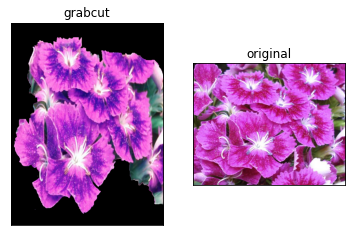

In [4]:
name = os.path.join(data_dir, "image_03539.jpg")
output = BG_img(name)
plt.subplot(121),  plt.imshow(output)
plt.title("grabcut"),plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.show()
